# Hands-on week 2, Data science in Neuroscience

You can download this Notebook from https://github.com/kevin-allen/dataScienceNeuro


## Plan for today

1. Review our machine example so far
2. Measuring model performance
3. Gradient descent
4. Training loop
5. Exercise
***

## Review

### Simulation of our speed cell

Yesterday, we started to work with our linear regression model. 

For a linear regression, the model is $Y = Xw + b$

In machine learning lingo, $w$ is the weight, and $b$ is the bias.

Our formula for simulating the firing rate is

$rate = speed*w + b + error$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fn = "../data/animal_speed.npy"

In [4]:
speed = np.load(fn)

w = 1.25 # parameter 2
b = 10 # parameter 1
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed * w + b + e
rate = np.maximum(0, rate) # eliminate the negative firing rates

$e$ is just to add noise to the linear prediction. Otherwise all our simulated firing rate would fall on a line. We don't expect the firing rate of real neurons to fall on a line.

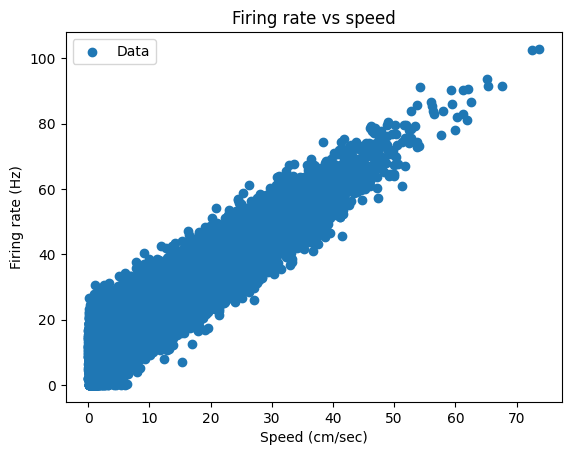

In [5]:
plt.scatter(speed,rate,label="Data")
plt.title("Firing rate vs speed")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

### Model prediction with matrix multiplication

This is our linear model:

$Y = Xw + b$


We used matrix multiplication to make model predictions on several data points. 

* We created a matrix with our model coefficients, with a shape of (1,2)
* We created a matrix with our speed data, with a shape of (2x27304)


$ \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 & 1 & 1 & 1 \\ speed_0 & speed_1 & speed_2 & speed_3 \end{bmatrix} = \begin{bmatrix} y_0 & y_1 & y_2 & y_3 \end{bmatrix}$


$y_0$ is the result of $b*1+w*speed_0$, just like our linear equation (y = b + xw).


In [6]:
theta = np.array([[0.0,3.0]]) # random guess of the 2 model parameters, same as above
X = np.ones((2,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row
X[1,:] = speed

Model prediction using $theta@X$

In [8]:
theta.shape, X.shape

((1, 2), (2, 27304))

In [9]:
yhat = theta@X

The multiplication gives a matrix of shape (1,27304). This matrix contains the predicted firing rate for our 27304 speed data points.

In [10]:
yhat.shape

(1, 27304)

In [9]:
rate

array([39.52163576, 34.99569512, 33.6069186 , ..., 45.46522408,
       50.95345323, 47.87911982])

In [11]:
yhat

array([[49.68329766, 55.18778178, 44.91174883, ..., 80.04574821,
        79.2355093 , 78.89726005]])

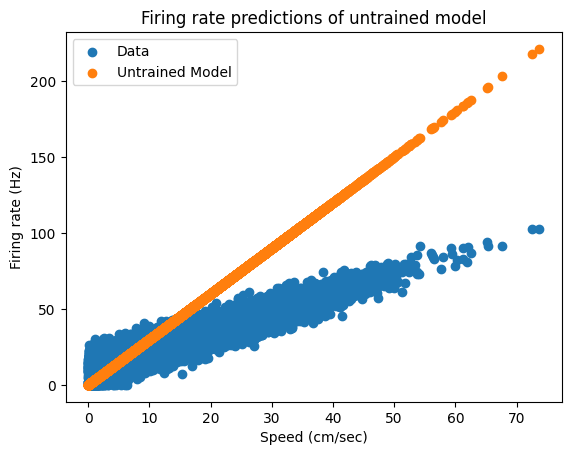

In [12]:
plt.scatter(speed,rate,label="Data")
plt.scatter(speed,yhat,label="Untrained Model")
plt.title("Firing rate predictions of untrained model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

## Measuring model performance

To be able to train a model, you need a measure of how bad its predictions are. This is usually measured using a `loss function`.

For linear regression model, the mean squared error (MSE) is often used as loss function. 


$MSE = \frac{1}{m} \sum_{i = 1}^{m}(\hat{y}^{i} - y^{i})^2$, where

* $m$ is the number of data points
* $y$ is the measured dependent variable (firing rate of the neuron) 
* $\hat{y}$ is the prediction of the model


### Exercise:

Calculate the mean squared error (MSE) for our untrained model

The task of the training loop (machine learning) in this exercise is to modify the model parameters to reduce the MSE to the smallest value possible.

## Training procedure using gradient descent

We want to tweak the parameters with the goal of reducing the MSE. 

One way to do this is to use an optimization algorithm called **gradient descent**. 

Gradient descent is capable of finding optimal solutions to many type of problems/functions.


<div>
<img src="../images/gradient_descent.png" width="1000"/>
</div>


With gradient descent, we calculate the slope of the loss function with the current parameters, then we change the parameters so that we move down the slope. 

The amount by which we move down the slope is controlled by a model **hyperparameter** called `learning rate`.

The model hyperparameters are not optimized from the data. They control how the model learns. 

We can have a look at the cost function as a function of different values of $\theta_1$ or $w$. This is the slope of our model.

In [13]:
print(rate.shape)
rateM = np.expand_dims(rate,0) # creating a matrix with one row and 27304 column, just like yhat.
print(rateM.shape)

(27304,)
(1, 27304)


In [14]:
theta = np.array([[10.0,2.0]]) 

In [15]:
theta.shape, X.shape

((1, 2), (2, 27304))

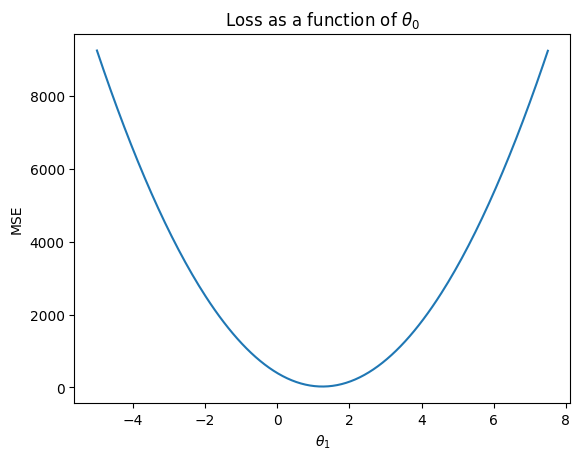

In [16]:
nDataPoints=200
theta[0,0]=10.0 # I am cheating and set b to the correct value to see if the loss function will have a minimum at the correct value of w

# calculate the loss function for different values of the second parameter of the model
res = np.empty(nDataPoints)
param_values = np.linspace(-5.0,7.5,nDataPoints)
for i,t in enumerate(param_values):
    theta[0,1]=t # change the second parameter of the model
    res[i] = np.mean((rateM-theta@X)**2) # calculate the loss (MSE) with the new parameter value, save the results in the res array


# plot the loss as a function of the parameter
plt.plot(param_values,res) 
plt.xlabel(r"$\theta_1$")
plt.ylabel("MSE")
plt.title(r"Loss as a function of $\theta_0$")
plt.show()

### Partial derivative of the cost function

**You don't need to understand the math, but you should understand the main idea.**

To be able to adjust the parameters in the right direction, we need to know the slope for a specific value of $\theta$.

This is called the partial derivative for our parameters.

For the case of the MSE, the formula for the partial derivative is:

$\nabla_{\theta}MSE(\theta) = \frac{2}{m} (\theta X - y)X^{T}$

* $m$ is the number of data points
* $\theta X$ is the matrix multiplication we use to make model predictions. With NumPy, this is `theta@X`.
* $y$ is the observed firng rate.
* $X^{T}$ is the transpose of $X$. With NumPy, this is `X.T`.

### Exercise:

Write the code that will give you the partial derivative.

In the training loop, negative gradients mean that you increase the values of the coefficients to reduce the MSE.

Because we use all observations to calculate the gradients, this is called **batch gradient descent**.

For more complex models, you can use [pytorch](https://pytorch.org/) to calculate the derivative for you automatically.

### Our first training loop

This is a simple training loop. We loop several times and make small adjustments to the coefficients on each iteration.

In [17]:
lr = 0.002 # learning rate
n_iterations = 6000 
m = rate.shape[0] # number of data points

# initialize the model parameters
theta = np.array([[20.0,-2.0]]) 
print("theta at start:", theta)

# learning loop
for iteration in range(n_iterations):

    # make a prediction by feeding data to our model
    yhat = theta@X
    
    # calculate the gradients of the loss function (MSE) given the current parameters
    gradients = 2/m *(yhat - rateM) @ X.T
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - lr * gradients

    if iteration%1000 == 0 or iteration<10:  # some information
        print("iteration:{}, gradients: {}".format(iteration,gradients))

print("optimized theta:",theta)

theta at start: [[20. -2.]]
iteration:0, gradients: [[  -52.12155036 -1312.69499501]]
iteration:1, gradients: [[  6.3601809 -71.1166835]]
iteration:2, gradients: [[ 9.4917568  -4.26051724]]
iteration:3, gradients: [[ 9.64292294 -0.65968656]]
iteration:4, gradients: [[ 9.6336361 -0.4649713]]
iteration:5, gradients: [[ 9.61574259 -0.45366692]]
iteration:6, gradients: [[ 9.59741884 -0.45224024]]
iteration:7, gradients: [[ 9.57910504 -0.451347  ]]
iteration:8, gradients: [[ 9.56082485 -0.45048405]]
iteration:9, gradients: [[ 9.54257947 -0.44962428]]
iteration:1000, gradients: [[ 1.43732497 -0.06772343]]
iteration:2000, gradients: [[ 0.21280311 -0.01002679]]
iteration:3000, gradients: [[ 0.03150656 -0.00148452]]
iteration:4000, gradients: [[ 0.0046647  -0.00021979]]
iteration:5000, gradients: [[ 6.90632390e-04 -3.25410011e-05]]
optimized theta: [[9.95650957 1.25322235]]


## Exercise: 

* Use our optimized model to make rate predictions 
* Plot the predicted and observed firing rates as a function of running speed. 

### Visualisation of the training process

Here I created a small animation to visualize the training process. 

Don't worry about all the details relating to plotting the data. The training process is exactly the same as above. 

We save training parameters $w$ and $b$, the MSE and the gradients in numpy arrays at each iteration, and use this data to generate a plot for each iteration. We then put all images together to create an animation.

The code takes approximately a minute to run.

In [23]:
import imageio
import os

In [24]:
lr = 0.002
n_epochs = 3000 # how many time we go through the data during the learning process, one epoch = one pass through the data.
m = rate.shape[0]
theta = np.array([[-10,-10]])

# variables for our animation
animation_dir = "../images/learning_animation/"
imageFileNames = []
save_every = 25

# arrays to store the results at each iteration
mseLearning = np.empty(n_epochs)
tLearning = np.empty((n_epochs,2))
gradLearning = np.empty((n_epochs,2))


for epoch in range(n_epochs):
    gradients = 2/m *(theta@X - rateM) @ X.T
    
    # save results for the animation
    mseLearning[epoch] = np.mean((rate-theta@X)**2)
    tLearning[epoch,:] = theta
    gradLearning[epoch,:] = gradients
    
    
    # change the parameters
    theta = theta - lr * gradients
    
    
    # make one figure for our animation

    if epoch < 5 or epoch % save_every == 0:
        fn = os.path.join(animation_dir,"image_{}.png".format(epoch))
        imageFileNames.append(fn)
        fig, ax = plt.subplots(1,4,figsize=(13,3),layout="constrained")
    
        # plot the MSE
        ax[0].plot(np.arange(epoch),mseLearning[:epoch])
        ax[0].set_xlim(0,n_epochs)
        ax[0].set_ylim(0,200)
        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("Loss (MSE)")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False) 
        ax[0].set_title("MSE")
        
        # plot the gradients
        ax[1].plot(np.arange(epoch),gradLearning[:epoch,1],label="$w$ gradient")
        ax[1].plot(np.arange(epoch),gradLearning[:epoch,0],label="$b$ gradient")
        ax[1].set_xlim(0,n_epochs)
        ax[1].set_ylim(-10,1)
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Gradients")
        ax[1].legend(loc=4)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False) 
        ax[1].set_title("Gradients")
    
        # plot the parameters
        ax[2].scatter(tLearning[:epoch,0],tLearning[:epoch,1],color="gray",s=3,alpha=0.5)
        ax[2].scatter(tLearning[epoch,0],tLearning[epoch,1],color="red",s=5)
        ax[2].set_xlim(-10,12)
        ax[2].set_ylim(-0.5,3)
        ax[2].set_xlabel("$b$")
        ax[2].set_ylabel("$w$")
        ax[2].text(-0.5, 2.5, "Epoch {}/{}".format(epoch,n_epochs))
        ax[2].spines['top'].set_visible(False)
        ax[2].spines['right'].set_visible(False)
        ax[2].set_title("Parameters")
    
        # plot the data and regression line
        x=np.arange(70)
        y = x*theta[0,1] + theta[0,0]
        
        
        ax[3].scatter(speed[::10],rate[::10],label="Data",alpha=0.5,s=1) # only plot every 10 data points to speed up plot function
        ax[3].plot(x,y,label="Model",color="red")
        ax[3].set_xlabel("Speed (cm/sec)")
        ax[3].set_ylabel("Firing rate (Hz)")
        ax[3].set_xlim(0,70)
        ax[3].set_ylim(-10,130)
        ax[3].legend(loc=4)
        ax[3].set_title("Data and Model")
        ax[3].spines['top'].set_visible(False)
        ax[3].spines['right'].set_visible(False)
        
        plt.savefig(fn)
        plt.close()
 
print("optimized theta:",theta)


optimized theta: [[9.89349625 1.2561914 ]]


We can make the animation from our saved image

In [25]:
fn = os.path.join(animation_dir,"learning_animation.gif")
with imageio.get_writer(fn, mode='I',loop=0) as writer:
    for filename in imageFileNames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)
# Remove files
for filename in set(imageFileNames):
    os.remove(filename)

<img src="../images/learning_animation/learning_animation.gif" width="1000" align="center">

## Alternative ways to find the best parameters

### sklearn.linear_model.LinearRegression

Scikit-Learn had built in classes to train linear and non-linear regression models. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.T,rate)
lin_reg.intercept_,lin_reg.coef_

(np.float64(9.956402411778871), array([0.       , 1.2532274]))

### pytorch

pytorch is a platform use principally to train deep neural network. 

https://pytorch.org/

To know how to download: https://pytorch.org/get-started/locally/




With pytorch, we need to put our data and model in torch.tensor objects instead of NumPy array. They work similarly for the most part. 

pytorch can calculate the derivative for you. The computations can be sent to the GPU if needed (not implemented here)


In [19]:
import torch

# linear model making prediction
def model(X,theta):
    return theta@X
# loss function returning MSE
def loss_fn(y,yhat):
    squared_diff = (y-yhat)**2
    return squared_diff.mean()

# model parameters stored as a pytorch tensor. This makes the calculation of the gradients possible
theta = torch.tensor([[20.0,-2.0]],requires_grad =True)
print("theta at start:", theta)

# We transform our data from NumPy array to Pytorch tensors. There is no need for gradients
XTensor = torch.tensor(X,dtype=torch.float32)
rateTensor= torch.tensor(rate,dtype=torch.float32)

# let's run the model once and calculate the loss
yhat = model(XTensor,theta)
loss = loss_fn(yhat,rateTensor)
print("loss:",loss)
loss.backward()

print("gradients: ",theta.grad)

# We need to zero the gradients; otherwise, they accumulate
theta.grad.zero_()


theta at start: tensor([[20., -2.]], requires_grad=True)
loss: tensor(1898.0017, grad_fn=<MeanBackward0>)
gradients:  tensor([[  -52.1215, -1312.6956]])


tensor([[0., 0.]])

In [80]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, learning_rate, theta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        if theta.grad is not None:
            theta.grad.zero_() 
        
        yhat = model(XTensor,theta)
        loss = loss_fn(yhat,rateTensor)
        loss.backward()
        
        with torch.no_grad():
            theta -= learning_rate * theta.grad
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}, theta: {}, Gradients: {}".format(epoch,loss, theta, theta.grad))
    return theta

In [24]:
opt_theta = training_loop(n_epochs = 10000,
                          learning_rate = 0.001,
                          theta = torch.tensor([20.0,-2.0],requires_grad =True),
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_theta)

Epoch: 0, Loss: 1898.279541015625, theta: tensor([20.0522, -0.6871], requires_grad=True), Gradients: tensor([  -52.1939, -1312.9094])
Epoch: 1, Loss: 580.1749877929688, theta: tensor([2.0075e+01, 4.9269e-03], requires_grad=True), Gradients: tensor([ -22.9481, -692.0174])
Epoch: 2, Loss: 214.13821411132812, theta: tensor([20.0827,  0.3698], requires_grad=True), Gradients: tensor([  -7.5422, -364.8546])
Epoch: 3, Loss: 112.44169616699219, theta: tensor([20.0821,  0.5622], requires_grad=True), Gradients: tensor([   0.5713, -192.4646])
Epoch: 4, Loss: 84.138916015625, theta: tensor([20.0773,  0.6639], requires_grad=True), Gradients: tensor([   4.8421, -101.6281])
Epoch: 5, Loss: 76.21393585205078, theta: tensor([20.0702,  0.7176], requires_grad=True), Gradients: tensor([  7.0881, -53.7640])
Epoch: 6, Loss: 73.94693756103516, theta: tensor([20.0619,  0.7462], requires_grad=True), Gradients: tensor([  8.2673, -28.5431])
Epoch: 7, Loss: 73.2509994506836, theta: tensor([20.0530,  0.7614], requ

Once again we found our initial parameters.

This type of output is very similar to what you see when you train DeepLabCut (more on this next week).

## Summary

* We implemented a linear regression model in python.
* We defined a cost function (MSE) to measure how good/bad the model predictions are.
* We calculated the partial derivative of the MSE for a set of coefficients.
* We wrote a training loop to adjust the coefficients iteratively in order to minimize MSE
* We covered 3 possible ways in which you can train models (klearn.linear_model, scipy.optimize.minimize and pytorch)
